In [3]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2

import torch

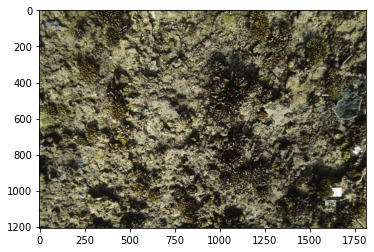

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'rec'. Expected sequence length 4, got 2
>  - Can't parse 'rec'. Expected sequence length 4, got 2


In [4]:
# im = glob.glob('../Complete_SUIT_Dataset/images/HUA_2021-05-27_15/JPEG/24mm')[0]
#label = glob.glob('/Volumes/SEAGATEBACK/SUITs/Images_with_SUITS/All_SUIT_annotations/HUA_2021-05-30_10_JPEG_60mm_DSC_5759*')

lbl = [-1,.373578,0.290000,0.149515,0.210588] # Yolo format
img_orig = np.array(cv2.imread('/Users/zhengzeng/PycharmProjects/underwater-object-detection/Complete_SUIT_Dataset/images/HUA_2021-05-27_15/JPEG/24mm/HUA_2021-05-27_15_JPEG_24mm_DSC_7298.JPG'))
img = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)

im_width = img.shape[1]
im_height = img.shape[0]

x_s = int(im_width*lbl[1] - int(im_width*lbl[3]/2))
x_e = int(im_width*lbl[1] + int(im_width*lbl[3]/2))
y_s = int(im_height*lbl[2] - int(im_height*lbl[4]/2))
y_e = int(im_height*lbl[2] + int(im_height*lbl[4]/2))
points = np.float32([[x_s,y_s],[x_s,y_e],[x_e,y_s],[x_e,y_e]])

plt.imshow(img)
plt.show()

im1 = img.copy()
im1 = cv2.rectangle(im1, tuple(points[0]), tuple(points[3]), (255,255,255), 20)
plt.imshow(im1)
plt.show()


In [8]:
def get_transformation_matrix(width, height, distortion_scale):
    """Get parameters for ``perspective`` for a random perspective transform.

    Args:
        width (int): width of the image.
        height (int): height of the image.
        distortion_scale (float): argument to control the degree of distortion and ranges from 0 to 1.

    Returns:
        List containing [top-left, top-right, bottom-right, bottom-left] of the original image,
        List containing [top-left, top-right, bottom-right, bottom-left] of the transformed image.
    """
    half_height = height // 2
    half_width = width // 2
    topleft = [
        int(torch.randint(0, int(distortion_scale * half_width) + 1, size=(1,)).item()),
        int(torch.randint(0, int(distortion_scale * half_height) + 1, size=(1,)).item()),
    ]
    topright = [
        int(torch.randint(width - int(distortion_scale * half_width) - 1, width, size=(1,)).item()),
        int(torch.randint(0, int(distortion_scale * half_height) + 1, size=(1,)).item()),
    ]
    botright = [
        int(torch.randint(width - int(distortion_scale * half_width) - 1, width, size=(1,)).item()),
        int(torch.randint(height - int(distortion_scale * half_height) - 1, height, size=(1,)).item()),
    ]
    botleft = [
        int(torch.randint(0, int(distortion_scale * half_width) + 1, size=(1,)).item()),
        int(torch.randint(height - int(distortion_scale * half_height) - 1, height, size=(1,)).item()),
    ]
    startpoints = np.float32([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]])
    endpoints = np.float32([topleft, topright, botright, botleft])
    #return startpoints, endpoints
    M = cv2.getPerspectiveTransform(startpoints, endpoints)
    return M
    
def apply_perspective_matrix(img,bbox,matrix,shape):
    new_image = cv2.warpPerspective(img, matrix,shape)
    points_t = bbox.reshape(1,4,2)
    print(points_t)
    new_box = cv2.perspectiveTransform(points_t, matrix)
    new_box = np.rint(new_box)
    
    h_max = int(np.amax(new_box[0],axis=0)[0])
    w_max = int(np.amax(new_box[0],axis=0)[1])
    
    h_min = int(np.amin(new_box[0],axis=0)[0])
    w_min = int(np.amin(new_box[0],axis=0)[1])
    
    return new_image,h_max,w_max,h_min,w_min

1814
1207
(1207, 1814, 3)
[[[542. 223.]
  [542. 477.]
  [812. 223.]
  [812. 477.]]]
804 549 577 286


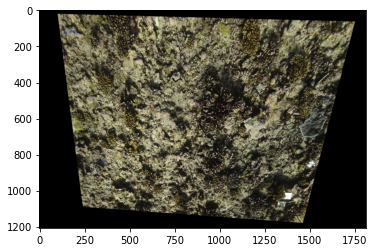

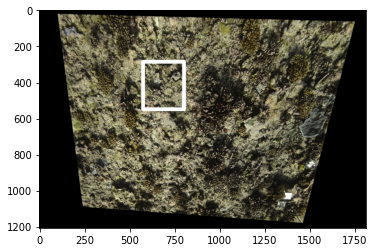

In [9]:
for i in range(1):
    print(im_width)
    print(im_height)
    print(img.shape)
    M = get_transformation_matrix(im_width,im_height,.5) #0-1
    image,h_max,w_max,h_min,w_min = apply_perspective_matrix(img,points,M,(im_width,im_height))
    print(h_max,w_max,h_min,w_min)
    
    plt.imshow(image)
    plt.show()
    
    im3 = image.copy()
    im3 = cv2.rectangle(im3, (h_min,w_min), (h_max,w_max), (255,255,255), 20)
    plt.imshow(im3)
    plt.show()


In [ ]:
Vertices